In [73]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from urllib.parse import quote_plus
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [89]:
def crawl_naver_news(keywords, start_date, end_date):
    news_data = []
    base_url = "https://search.naver.com/search.naver"
    date_format = "%Y.%m.%d"
    
    for keyword in keywords:
        current_start_date = start_date
        while current_start_date <= end_date:
            params = {
                'where': 'news',
                'query': keyword,
                'sm': 'tab_opt',
                'sort': '0',
                'photo': '0',
                'field': '0',
                'reporter_article': '',
                'pd': '3',
                'ds': current_start_date.strftime(date_format),
                'de': current_start_date.strftime(date_format),
                'docid': '',
                'nso': 'so:r,p:from{}to{},a:all'.format(current_start_date.strftime("%Y%m%d"), current_start_date.strftime("%Y%m%d")),
                'start': 1,
            }
            
            response = requests.get(base_url, params=params)
            soup = BeautifulSoup(response.text, 'html.parser')
            news_items = soup.select('a.news_tit')
            
            for item in news_items:
                title = item.get('title')
                url = item.get('href')
                news_data.append({'keyword': keyword, 'title': title, 'url': url})

                time.sleep(3)
            
            # 한 페이지에 모든 결과가 나올 것으로 예상되지만, 필요에 따라 페이지네이션을 처리하는 로직 추가 가능
            current_start_date += pd.Timedelta(days=1)  # 다음 날짜로 이동

    return pd.DataFrame(news_data)

keywords = ["경제", "금융", "위기", "주식", "외국인", "기관", "개인", "삼성전자"]
start_date = pd.to_datetime("2020-01-01")
end_date = pd.to_datetime("2020-12-31")
df_news = crawl_naver_news(keywords, start_date, end_date)
print(df_news)


     keyword                                    title  \
0         경제                    송병기 울산시 경제부시장 구속영장 기각   
1         경제    김정은, 경제부문 질타…"허리띠 졸라매도 제재봉쇄 돌파해야"(종합)   
2         경제      北 '새로운 길'은 "정면돌파전"…사실상 '경제·핵 병진' 회귀   
3         경제          北, '정면돌파' 위한 라인업 개편…경제·군사 힘실어주기   
4         경제   北 ‘핵·경제 병진’ 회귀… 자력갱생으로 제재 정면 돌파 [뉴스분석]   
...      ...                                      ...   
3765      금융        은성수 금융위원장의 세종 '픽'… 학군·BRT에 대학병원까지   
3766      금융                        [인사]KB금융지주·KB국민은행   
3767      금융  [이기자의 친절한 금융] 귀찮은 연말정산, 직접 손품 팔아야 하는 이유   
3768      금융           금융권, 골프마케팅 '봇물'…이미지 제고 효과 '톡톡'   
3769      금융               이번 주 국내 주요 금융일정(1.13~1.17)   

                                                    url  
0     http://news.mk.co.kr/newsRead.php?no=1729&year...  
1          http://yna.kr/AKR20200101009951504?did=1195m  
2     https://news.sbs.co.kr/news/endPage.do?news_id...  
3     http://www.newsis.com/view/?id=NISX20200101_00...  
4     http://www.segye.co

In [88]:
# def crawl_naver_news(keyword, start_date, end_date):
#     news_data = []
#     base_url = "https://search.naver.com/search.naver"
#     date_format = "%Y.%m.%d"
    
#     while start_date <= end_date:
#         params = {
#             'where': 'news',
#             'query': keyword,
#             'sm': 'tab_opt',
#             'sort': '0',
#             'photo': '0',
#             'field': '0',
#             'reporter_article': '',
#             'pd': '3',
#             'ds': start_date.strftime(date_format),
#             'de': start_date.strftime(date_format),
#             'docid': '',
#             'nso': 'so:r,p:from{}to{},a:all'.format(start_date.strftime("%Y%m%d"), start_date.strftime("%Y%m%d")),
#             'start': 1,
#         }
        
#         response = requests.get(base_url, params=params)
#         soup = BeautifulSoup(response.text, 'html.parser')
#         news_items = soup.select('a.news_tit')
        
#         for item in news_items:
#             title = item.get('title')
#             url = item.get('href')
#             news_data.append({'title': title, 'url': url})

#             time.sleep(3)
        
#         # 한 페이지에 모든 결과가 나올 것으로 예상되지만, 필요에 따라 페이지네이션을 처리하는 로직 추가 가능
#         start_date += pd.Timedelta(days=1)  # 다음 날짜로 이동

#     return pd.DataFrame(news_data)
# keyword = "경제 or 금융 or 위기 or 주식 or 외국인 or 기관 or 개인 or 삼성전자"
# start_date = pd.to_datetime("2020-01-01")
# end_date = pd.to_datetime("2020-12-31")
# df_news = crawl_naver_news(keyword, start_date, end_date)
# print(df_news)

0

In [90]:
# 데이터프레임을 CSV 파일로 저장
df_news.to_csv('/home/verlo/dev_ws/EDA/data/2020_naver_news.csv', index=False, encoding='utf-8-sig')

In [91]:
# CSV 파일 불러오기
df = pd.read_csv('/home/verlo/dev_ws/EDA/data/2020_naver_news.csv', encoding='utf-8-sig')
df

,keyword,title,url
0,경제,송병기 울산시 경제부시장 구속영장 기각,http://news.mk.co.kr/newsRead.php?no=1729&year...
1,경제,"김정은, 경제부문 질타…""허리띠 졸라매도 제재봉쇄 돌파해야""(종합)",http://yna.kr/AKR20200101009951504?did=1195m
2,경제,"北 '새로운 길'은 ""정면돌파전""…사실상 '경제·핵 병진' 회귀",https://news.sbs.co.kr/news/endPage.do?news_id...
3,경제,"北, '정면돌파' 위한 라인업 개편…경제·군사 힘실어주기",http://www.newsis.com/view/?id=NISX20200101_00...
4,경제,北 ‘핵·경제 병진’ 회귀… 자력갱생으로 제재 정면 돌파 [뉴스분석],http://www.segye.com/content/html/2020/01/01/2...
...,...,...,...
3765,금융,은성수 금융위원장의 세종 '픽'… 학군·BRT에 대학병원까지,http://news.mt.co.kr/mtview.php?no=20200109140...
3766,금융,[인사]KB금융지주·KB국민은행,http://www.ftoday.co.kr/news/articleView.html?...
3767,금융,"[이기자의 친절한 금융] 귀찮은 연말정산, 직접 손품 팔아야 하는 이유",http://moneys.mt.co.kr/news/mwView.php?no=2020...
3768,금융,"금융권, 골프마케팅 '봇물'…이미지 제고 효과 '톡톡'",http://www.newstomato.com/ReadNews.aspx?no=944948


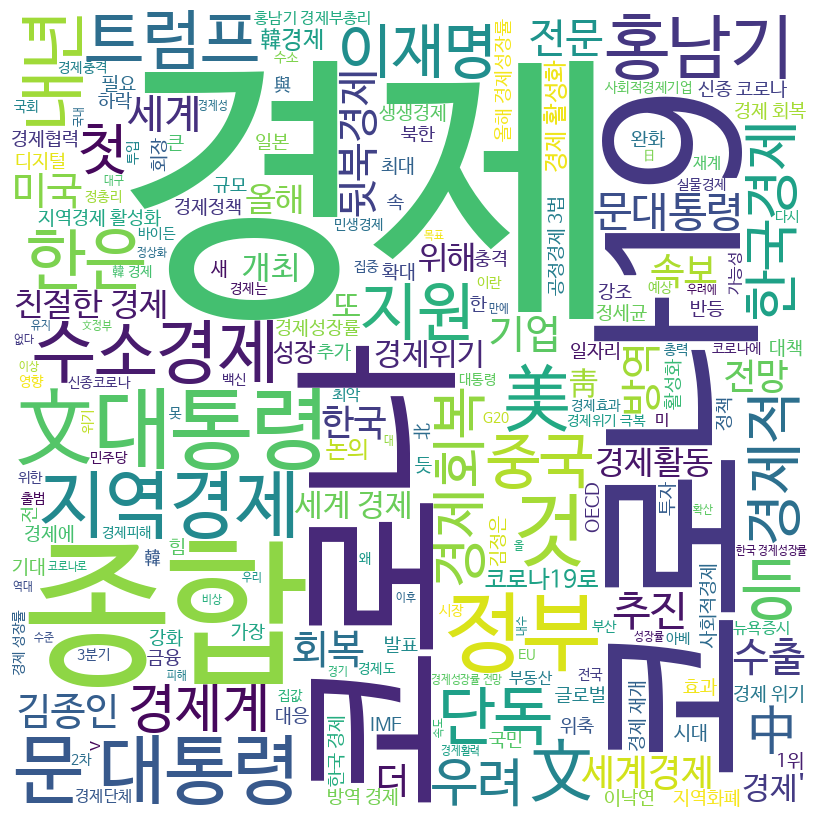

In [92]:
# CSV 파일 읽기
df = pd.read_csv('/home/verlo/dev_ws/EDA/data/2020_naver_news.csv', encoding='utf-8-sig')

# 워드 클라우드를 생성할 열 선택
text = ' '.join(df['title'].dropna())  # 'your_column'을 실제 열 이름으로 변경하세요.

# 한글 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"  # 사용하고자 하는 한글 폰트 경로로 변경하세요.
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 워드 클라우드 생성
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, font_path=font_path).generate(text)

# 워드 클라우드 시각화
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [84]:
# # 'title' 컬럼의 모든 텍스트를 하나의 문자열로 결합
# text = ' '.join(df['title'])  # 'title' 대신 원하는 컬럼명 사용

# wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white').generate(text)

# # 워드 클라우드 시각화
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()